# Esercizio 5.1

L'esercizio richiede di calcolare il valore medio della distanza dell'elettrone rispetto al nucleo nel ground state e nel primo stato eccitato attraverso l'algoritmo di Metropolis. 
Le funzioni d'onda dei due stati ci forniscono l'informazione della densità di probabilità dell'elettrone:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$

I valori medi esatti, ottenuti analiticamente, delle posizioni del ground state e del primo stato eccitato sono le seguenti:

$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

Nei risultati il raggio di bor a$_0$ è stato preso uguale a 1.

L'algoritmo di Metropolis va a costruire la nostra densità di probabilità attraverso una catena di Markov utilizzando tecniche di reiezione. In pratica si genera una posizione iniziale da cui il nostro elettrone parte, si propone uno spostamento (casuale in un range $\delta$) e si calcola la probabilità che l'elettrone si trovi nella posizione iniziale e nella posizione proposta. Dal rapporto di queste due otteniamo l'accettazione $\alpha$. Dopodiché si estrae un numero causale con diverse distribuzioni e se questo è minore dell'accettazione l'elettrone viene spostato nella nuova posizione, mentre in caso contrario rimane nella posizione precedente. Le distribuzioni utilizzate per estrarre il numero sono state quella uniforme e quella gaussiana.
Ripetendo il procedimento per un certo numero di volte con un certo numero di step si ottiene la distribuzione di probabilità finale, da cui poi è stato estratto il valore medio della posizione.

Il parametro $\delta$ è stato scelto in modo tale che la probabilità di accettazione sia del 50%, e il suo valore è stato cambiato per ogni simulazione in base al metodo utilizzato.
I risultati ottenuti dalla scelta della variabile casuale con distribuzione uniforme sembrano essere lievemente migliori rispetto alla scelta gaussiana, anche se non in modo significativo.



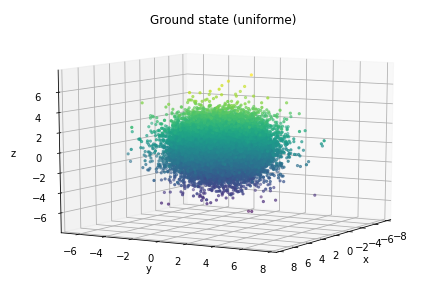

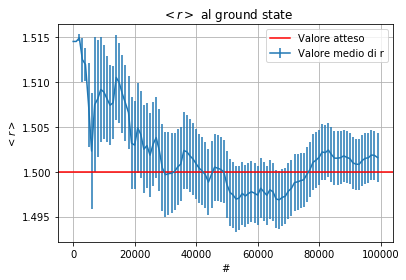

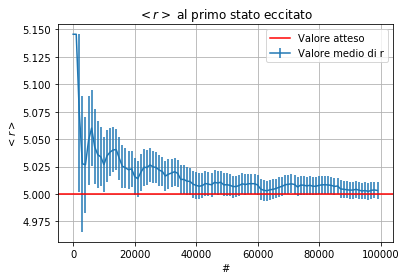

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

P1_unif=np.loadtxt("P1_uni")
r1_unif=np.loadtxt("<r1>_uni")
P0_unif=np.loadtxt("P0_uni")
r_unif=np.loadtxt("<r0>_uni")
x=np.arange(100)*1000

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(P0_unif[:,0], P0_unif[:,1], P0_unif[:,2],c=P0_unif[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Ground state (uniforme)")
ax.view_init(10, 30)
plt.show()

plt.axhline(y=1.5, color='r', linestyle='-',label="Valore atteso")
plt.errorbar(x,r_unif[:,0],r_unif[:,1],label="Valore medio di r")
plt.xlabel("#")
plt.ylabel("$<r>$")
plt.title(" $<r>$ al ground state")
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(P1_unif[:,0], P1_unif[:,1], P1_unif[:,2], c=P1_unif[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Primo stato eccitato (uniforme)")
ax.view_init(10, 30)
plt.show()

plt.axhline(y=5, color='r', linestyle='-',label="Valore atteso")
plt.errorbar(x,r1_unif[:,0],r1_unif[:,1],label="Valore medio di r")
plt.xlabel("#")
plt.ylabel("$<r>$")
plt.title("$<r>$ al primo stato eccitato")
plt.legend()
plt.grid(True)
plt.show()



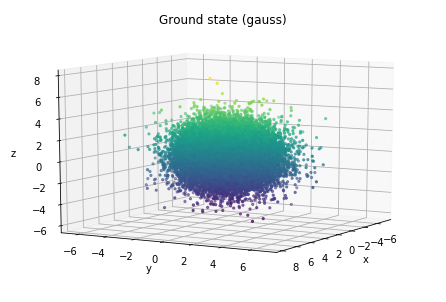

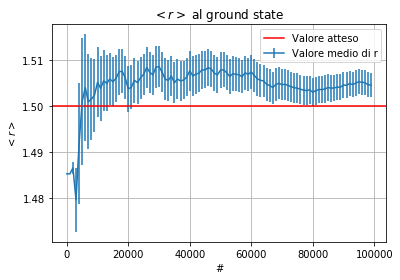

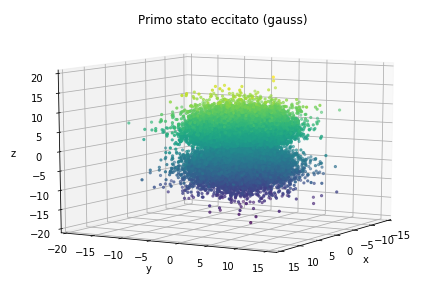

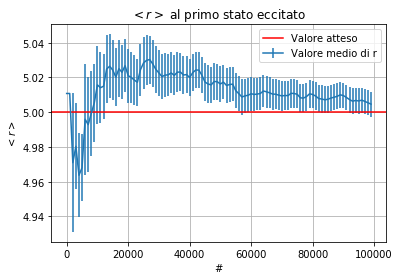

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

P1_gauss=np.loadtxt("P1_gauss")
r1_gauss=np.loadtxt("<r1>_gauss")
P0_gauss=np.loadtxt("P0_gauss")
r_gauss=np.loadtxt("<r0>_gauss")
x=np.arange(100)*1000

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(P0_gauss[:,0], P0_gauss[:,1], P0_gauss[:,2], c=P0_gauss[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Ground state (gauss)")
ax.view_init(10, 30)
plt.show()

plt.errorbar(x,r_gauss[:,0],r_gauss[:,1],label="Valore medio di r")
plt.axhline(y=1.5, color='r', linestyle='-',label="Valore atteso")
plt.xlabel("#")
plt.ylabel("$<r>$")
plt.title("$<r>$ al ground state")
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(P1_gauss[:,0], P1_gauss[:,1], P1_gauss[:,2], c=P1_gauss[:,2], marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Primo stato eccitato (gauss)")
ax.view_init(10, 30)
plt.show()

plt.errorbar(x,r1_gauss[:,0],r1_gauss[:,1],label="Valore medio di r")
plt.axhline(y=5, color='r', linestyle='-',label="Valore atteso")
plt.xlabel("#")
plt.ylabel("$<r>$")
plt.title("$<r>$ al primo stato eccitato")
plt.legend()
plt.grid(True)
plt.show()